# Practice: Unconstrained optimization with scipy

Scipy's fmin function provides an easy way to get solution for uncostrained optimization problems

In [12]:
from scipy.optimize import fmin

# f(x) = (x-1)^2 = x^2 - 2x+1
fx = lambda x: (x ** 2)-(2 *(x))+1

fmin(fx,[0])

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 25
         Function evaluations: 50


array([1.])

In [13]:
from scipy.optimize import fmin

# f(x) = (x-3)^2 = x^2 - 6x + 9
fx = lambda x: (x ** 2) - (6*(x)) +9

fmin(fx,[0])

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 28
         Function evaluations: 56


array([3.])

In [14]:
from scipy.optimize import fmin

# f(x) = x^3 - 3^2 + 7
fx = lambda x: (x ** 3)-(3 *(x ** 2))+7

fmin(fx,[0.1])

Optimization terminated successfully.
         Current function value: 3.000000
         Iterations: 22
         Function evaluations: 44


array([2.])

In [15]:
from scipy.optimize import fmin

# f(x) = 4x_1^2 - 4x_1x_2 + 2x_2^2
fx = lambda x: 4*x[0]*x[0] - 4*x[0]*x[1] + 2*x[1]*x[1]

fmin(fx,[2,3])

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 42
         Function evaluations: 80


array([-2.96104209e-05, -5.12941001e-05])

# Exercise: Gradient descent

Consider the following **gradient descent algorithm** (which is a variant of the directional search algorithm) that aims to find the $x$ value that minimizes the function $f(x)$.

- Guess $x^{(0)}$, set $k\leftarrow 0$
- while $\| \nabla f(x^{(k)}) \| \geq \epsilon$ do
     - $x^{(k+1)} = x^{(k)} - \eta_k \nabla f(x^{(k)})$
     -  $k\leftarrow k+1$
- end while
- return $x^{(k)}$

## Part 1

Assume that
$$f(x) = x^3 - 3x^2 + 7$$
Implement the gradient descent algorithm to find the $x$ value that minimizes $f(x)$. Choose the starting point and step size as with $x^{(0)} = 0.5$ and $\eta = 0.05$

**Important Questions**: Is $f(x)$ convex? If not, is it guaranteed that gradient descent or fmin would generate global optimal solution? What happens if you start with $x^{(0)} = -0.5$ instead? Do you still get the same solution?

In [16]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def gradDescent_1D(gfx, gfxGrad, gx0, gdEps, gdStepSize = 0.05):
    x_list, y_list = [gx0], [gfx(gx0)]
    
    x_new = gx0
    x_prev = gx0 + 10.0*gdEps # arbitrary initialization
    
    # keep looping until your desired precision
    k = 0
    while abs(x_new - x_prev) > gdEps:
        
        # change the value of x
        x_prev = x_new
        
        # get the derivation of the old value of x
        d_x = - gfxGrad(x_prev)
        
        # get your new value of x by adding the previous, the multiplication of the derivative and the learning rate
        x_new = x_prev + (gdStepSize * d_x)
        
        # append the new value of x to a list of all x-s for later visualization of path
        x_list.append(x_new)
        
        # append the new value of y to a list of all y-s for later visualization of path
        y_list.append(gfx(x_new))
          
        print(k, ' ', x_prev, '---' , x_new)
        k = k + 1

    print ("Local minimum occurs at: "+ str(x_new))
    print ("Number of steps: " + str(len(x_list)))

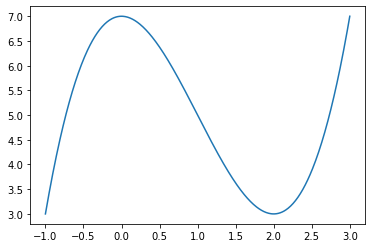

0   0.5 --- 0.6125
1   0.6125 --- 0.7399765625000001
2   0.7399765625000001 --- 0.8798347342926027
3   0.8798347342926027 --- 1.0276687806302234
4   1.0276687806302234 --- 1.1775539464169889
5   1.1775539464169889 --- 1.3228251358337517
6   1.3228251358337517 --- 1.4571927255848396
7   1.4571927255848396 --- 1.5758389473356855
8   1.5758389473356855 --- 1.676100373345385
9   1.676100373345385 --- 1.7575336161197197
10   1.7575336161197197 --- 1.8214550391870068
11   1.8214550391870068 --- 1.8702367819761478
12   1.8702367819761478 --- 1.9066399734705175
13   1.9066399734705175 --- 1.9333405672463244
14   1.9333405672463244 --- 1.952671875076171
15   1.952671875076171 --- 1.9665343198419987
16   1.9665343198419987 --- 1.9764060311271334
17   1.9764060311271334 --- 1.9834007204839172
18   1.9834007204839172 --- 1.988339173926674
19   1.988339173926674 --- 1.9918170255189651
20   1.9918170255189651 --- 1.9942618737025721
21   1.9942618737025721 --- 1.9959783726777898
22   1.99597837267778

In [17]:
#creating the function and plotting it 
fx = lambda x: (x ** 3)-(3 *(x ** 2))+7
fx_grad = lambda x: 3*(x**2) - 6*x

#Get 1000 evenly spaced numbers between -1 and 3 (arbitratil chosen to ensure steep curve)
z = np.linspace(-1.0,3,500)

#Plot the curve
plt.plot(z, fx(z))
plt.show()

x0 = 0.5
d_epsilon = 0.0001
d_stepSize = 0.05
gradDescent_1D(fx, fx_grad, x0, d_epsilon, d_stepSize)

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import itertools
from itertools import product

In [22]:
def func(x):
    return x**2 - 2*x - 3

def fprime(x):
    return 2*x - 2

In [23]:
def plotFunc(x0):
    x = np.linspace(-5, 7, 100)
    plt.plot(x, func(x))
    plt.plot(x0, func(x0), 'ro')
    plt.xlabel('$x$')
    plt.ylabel('$f(x)$')
    plt.title('Objective Function')

def plotPath(xs, ys, x0):
    plotFunc(x0)
    plt.plot(xs, ys, linestyle='--', marker='o', color='orange')
    plt.plot(xs[-1], ys[-1], 'ro')

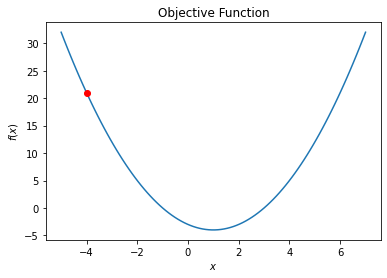

In [24]:
x0 = -4
plotFunc(x0)

In [25]:
def GradientDescentSimple(func, fprime, x0, alpha, tol=1e-5, max_iter=1000):
    # initialize x, f(x), and -f'(x)
    xk = x0
    fk = func(xk)
    pk = -fprime(xk)
    # initialize number of steps, save x and f(x)
    num_iter = 0
    curve_x = [xk]
    curve_y = [fk]
    # take steps
    while abs(pk) > tol and num_iter < max_iter:
        # calculate new x, f(x), and -f'(x)
        xk = xk + alpha * pk
        fk = func(xk)
        pk = -fprime(xk)
        # increase number of steps by 1, save new x and f(x)
        num_iter += 1
        curve_x.append(xk)
        curve_y.append(fk)
    # print results
    if num_iter == max_iter:
        print('Gradient descent does not converge.')
    else:
        print('Solution found:\n  y = {:.4f}\n  x = {:.4f}'.format(fk, xk))
    
    return curve_x, curve_y


Solution found:
  y = -3.8155
  x = 0.5705


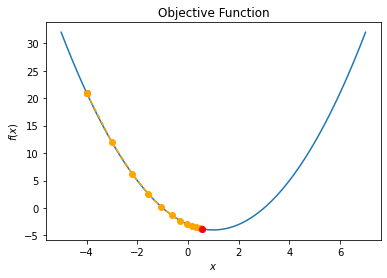

In [46]:
xs, ys = GradientDescentSimple(func, fprime, x0, alpha=0.1, tol=1)
plotPath(xs, ys, x0)

In [42]:
xs

[-4,
 -3.0,
 -2.2,
 -1.56,
 -1.048,
 -0.6384000000000001,
 -0.31072000000000005,
 -0.04857600000000001,
 0.16113919999999998,
 0.32891136,
 0.46312908799999997,
 0.5705032703999999]

Solution found:
  y = -4.0000
  x = 1.0000


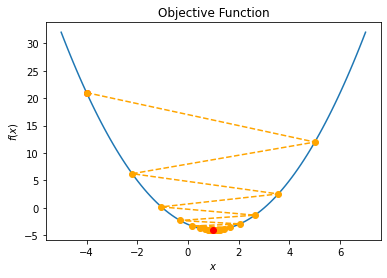

In [27]:
xs, ys = GradientDescentSimple(func, fprime, x0, alpha=0.9)
plotPath(xs, ys, x0)

Gradient descent does not converge.


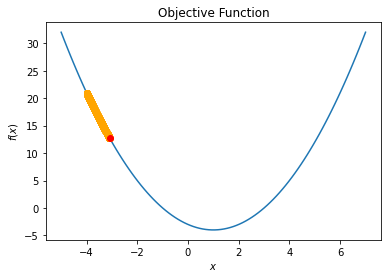

In [28]:
xs, ys = GradientDescentSimple(func, fprime, x0, alpha=1e-4)
plotPath(xs, ys, x0)

Gradient descent does not converge.


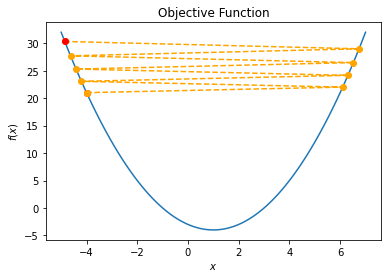

In [29]:
xs, ys = GradientDescentSimple(func, fprime, x0, alpha=1.01, max_iter=8)
plotPath(xs, ys, x0)

#### Observations :
* The first scenario converges like a charm. Even though the step length is constant, the direction is decreasing towards zero and hence results in a convergence.
* The second scenario also converges even though the learning path is oscillating around the solution due to the big step length
* The third scenario moves towards the solution. However, the step length is so small so that the number of iterations is maxed out. Increasing max_iter will solve the issue even though it will take much longer to arrive at the solution.
* The fourth scenario diverges due to the big step length. Here, we set max_iter = 8 to make the visualization more pleasing.